<a href="https://colab.research.google.com/github/Sumetjutha/MyProject/blob/main/2_decisiontree_golf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
""" 
This python program predict if a player will play golf that day base on the weather 
(Outlook,Tempareture,Humidity,Windy) using a machine learning called Desition Tree
"""

# Import Dependency
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image

In [4]:
# Create the Dataset
# Createb empty data frame
golf_df = pd.DataFrame()

# Add Outlook
golf_df['Outlook'] = ['sunny','sunny','overcast','rainy','rainy','rainy',
'overcast','sunny','sunny','rainy','sunny','overcast','overcast','rainy']

# Add Tempareture
golf_df['Tempareture'] = ['hot','hot','hot','mild','cool','cool','cool',
'mild','cool','mild','mild','mild','hot','mild']

# Add Humidity
golf_df['Humidity'] = ['high','high','high','high','normal','normal','normal','high',
'normal','normal','normal','high','normal','high']

# Add Windy
golf_df['Windy'] = ['false','true','false','false','false','true','true',
'false','false','false','true','true','false','true']

# Add Target Variable Play
golf_df['Play'] = ['no','no','yes','yes','yes','no','yes','no','yes','yes',
'yes','yes','yes','no']

In [5]:
# Convert the categorical data into dummy/indicator variables or (binary variables)
one_hot_data = pd.get_dummies(golf_df[['Outlook','Tempareture','Humidity','Windy']])

# Look at the data
print(golf_df)

# Take a look at one_hot_data
print(one_hot_data)

     Outlook Tempareture Humidity  Windy Play
0      sunny         hot     high  false   no
1      sunny         hot     high   true   no
2   overcast         hot     high  false  yes
3      rainy        mild     high  false  yes
4      rainy        cool   normal  false  yes
5      rainy        cool   normal   true   no
6   overcast        cool   normal   true  yes
7      sunny        mild     high  false   no
8      sunny        cool   normal  false  yes
9      rainy        mild   normal  false  yes
10     sunny        mild   normal   true  yes
11  overcast        mild     high   true  yes
12  overcast         hot   normal  false  yes
13     rainy        mild     high   true   no
    Outlook_overcast  Outlook_rainy  ...  Windy_false  Windy_true
0                  0              0  ...            1           0
1                  0              0  ...            0           1
2                  1              0  ...            1           0
3                  0              1  ...      

In [6]:
# Create the decision tree classifier
clf = tree.DecisionTreeClassifier()

# Train the Dicision tree
clf_train = clf.fit(one_hot_data, golf_df['Play'])

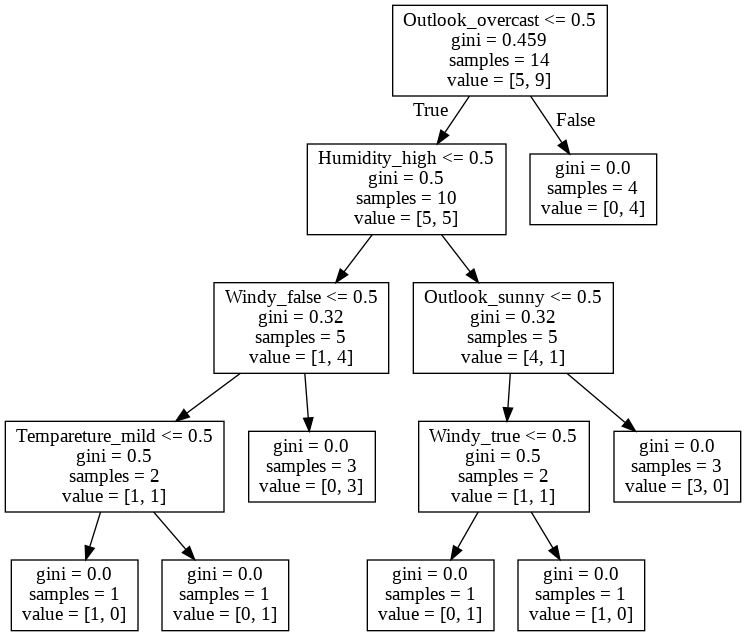

In [7]:
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [8]:
# Test the Model Prediction
# Outlook = sunny, Temparature = hot, Humidity = normal, Windy = false

prediction = clf_train.predict([[0,0,1,0,1,0,0,1,1,0]])

print(prediction)

['yes']
